In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_train = pd.read_csv('hotel_train.csv',encoding='latin-1')
hotel_train.head()
#training dataset

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
hotel_test=pd.read_csv('hotel_test.csv',encoding='latin-1')
hotel_test.head()
#testing dataset

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [4]:
hotel_train.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)


hotel_train.rename(columns={'Is_Response':'label','Description':'review'},inplace=True)

# EDA

In [5]:
hotel_train.head()

,review,label
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [6]:
print ('Shape = >',hotel_train.shape)

Shape = > (38932, 2)


In [7]:
print ('happy and not happy counts','\n',hotel_train.label.value_counts())

happy and not happy counts 
 happy        26521
not happy    12411
Name: label, dtype: int64


In [8]:
print ('happy ratio = ', round(len(hotel_train[hotel_train['label']=='happy']) / len(hotel_train.label),2)*100,'%')
print ('not happy ratio  = ', round(len(hotel_train[hotel_train['label']=='not happy']) / len(hotel_train.label),2)*100,'%')

happy ratio =  68.0 %
not happy ratio  =  32.0 %


In [9]:
hotel_train['length'] = hotel_train.review.str.len()
hotel_train.head(5)

,review,label,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613


In [10]:
hotel_train['label'].replace({'happy':0,'not happy':1},inplace=True)
#providing values to target variable

# DATA CLEANING

In [11]:
hotel_train['review'] = hotel_train['review'].str.lower()

In [12]:
hotel_train['review'] = hotel_train['review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
hotel_train['review'] = hotel_train['review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
hotel_train['review'] = hotel_train['review'].str.replace(r'^\s+|\s+?$', '')

In [13]:
hotel_train.head()

,review,label,length
0,the room was kind of clean but had a very stro...,1,248
1,i stayed at the crown plaza april april the st...,1,1077
2,i booked this hotel through hotwire at the low...,1,1327
3,stayed here with husband and sons on the way t...,0,502
4,my girlfriends and i stayed here to celebrate ...,1,1613


In [14]:
import string
import nltk
from nltk.corpus import  stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','i','and','on','us','would'])
punct =string.punctuation


hotel_train['review'] = hotel_train['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
hotel_train['review'] = hotel_train['review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
hotel_train['review'] = hotel_train['review'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
hotel_train['review'] = hotel_train['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
#we can see punctuations such as "" and also youtube links website links let's remove them also stop words


In [15]:
hotel_train['clean_length'] = hotel_train.review.str.len()
hotel_train.head()

,review,label,length,clean_length
0,room kind clean strong smell dogs generally av...,1,248,134
1,stayed crown plaza april april staff friendly ...,1,1077,637
2,booked hotel hotwire lowest price could find g...,1,1327,768
3,stayed husband sons way alaska cruise loved ho...,0,502,333
4,girlfriends stayed celebrate th birthdays plan...,1,1613,941


In [16]:
print ('Origian Length', hotel_train.length.sum())
print ('Clean Length', hotel_train.clean_length.sum())

Origian Length 33677860
Clean Length 20236444


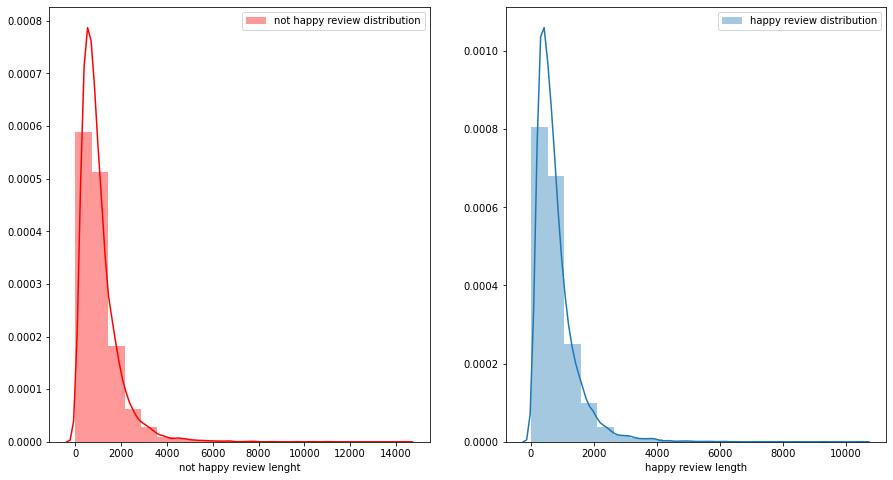

In [17]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(hotel_train[hotel_train['label']==1]['length'],bins=20,ax=ax[0],label='not happy review distribution',color='r')

ax[0].set_xlabel('not happy review lenght')
ax[0].legend()

sns.distplot(hotel_train[hotel_train['label']==0]['length'],bins=20,ax=ax[1],label='happy review distribution')
ax[1].set_xlabel('happy review length')
ax[1].legend()

plt.show()

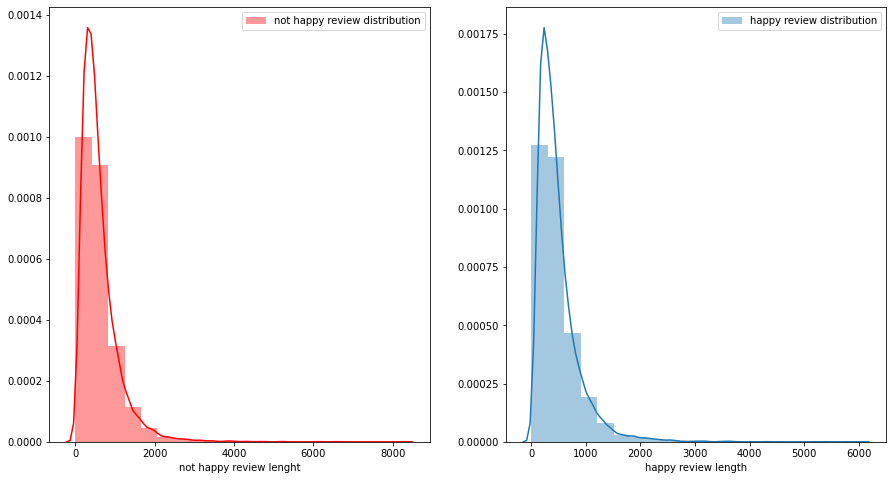

In [18]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(hotel_train[hotel_train['label']==1]['clean_length'],bins=20,ax=ax[0],label='not happy review distribution',color='r')

ax[0].set_xlabel('not happy review lenght')
ax[0].legend()

sns.distplot(hotel_train[hotel_train['label']==0]['clean_length'],bins=20,ax=ax[1],label='happy review distribution')
ax[1].set_xlabel('happy review length')
ax[1].legend()

plt.show()

In [ ]:
#LETS HAVE A LOOK AT CLEANED TEXT 

In [ ]:
#HAVING A LOOK AT 5 MOST POSTIVE AND NEGATIVE REVIEWS

In [20]:
from textblob import TextBlob
hotel_train['polarity']=hotel_train['review'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [21]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(hotel_train.iloc[hotel_train['polarity'].sort_values(ascending=False)[:5].index]['review']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 westin wonderfully restored grande dame hotel beds linens excellent pay internet
Review 2:
 service hotels excellent like idea feeding fish time
Review 3:
 making arrangements sisters travel received awesome customer service staff management went way meet needs sister recommend everyone stay
Review 4:
 staying hilton sanya hilton shanghai hilton san francisco always make feel like home facility hilton best newer service always best
Review 5:
 hotel houston stay excellent service


In [22]:
print("5 Random Reviews with lowest Polarity:")
for index,review in enumerate(hotel_train.iloc[hotel_train['polarity'].sort_values(ascending=True)[:5].index]['review']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with lowest Polarity:
Review 1:
 rooms reeked like mildew bathroom disgusting hallway rooms smelled like urine
Review 2:
 never stay go work motel since owner want rip employees customer worst ethics people world
Review 3:
 terrible experience car parked inside hotel valet parking garage gps stolen car inside glove box hotel cooperating way worst experience ever recommed hotel anybody
Review 4:
 please stay hotel worst experience ever threw
Review 5:
 make terrible mistake hotel dump pictures rooms website look like hotel hotel something horror movie charged room even stay could stay conditions canceled reservation


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
co = CountVectorizer(stopwords)
counts = co.fit_transform(hotel_train.review)
df1=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(15)
df1
#WORDS THAT COME TOO OFTEN

,0
hotel,72303
room,62422
stay,26531
great,25721
staff,24514
rooms,20284
one,19087
good,19070
location,18611
nice,18492


In [24]:
!pip install wordcloud

In [ ]:
#NOT HAPPY WORD CLOUD

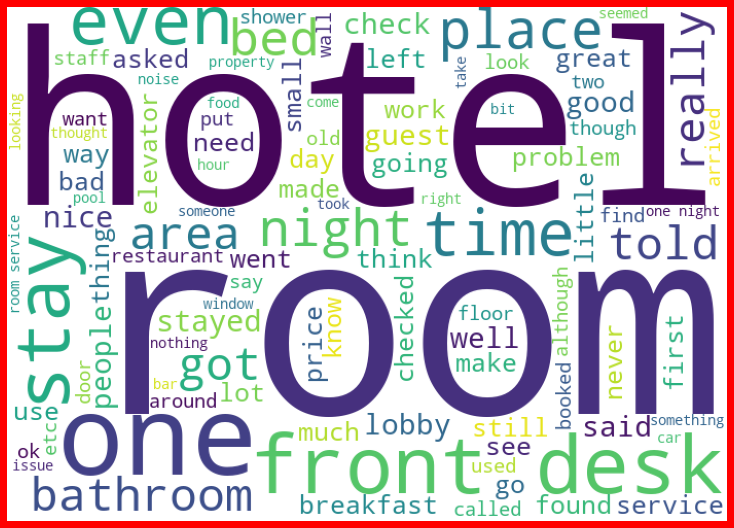

In [25]:
from wordcloud import WordCloud


reviews = hotel_train['review'][hotel_train['label']==1]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#MOST OCCURED WORDS ARE HOTEL ROOM ALSO BAD PROBLEM ISSUE  ARE OCCURING 

In [ ]:
#HAPPY WORD CLOUD

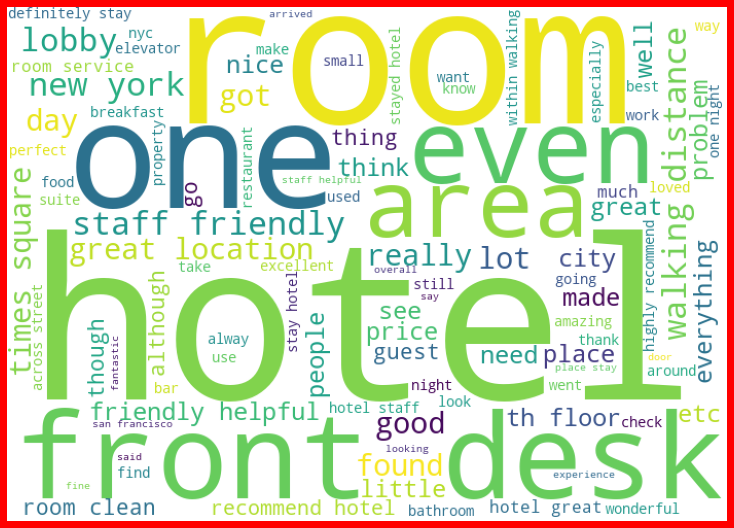

In [26]:
from wordcloud import WordCloud


reviews = hotel_train['review'][hotel_train['label']==0]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#HERE ALSO HOTEL ROOM OCCURS MOST BUT FREINDY BEST RECOMMEND HOTEL WONDERFUL DEFINATELY STAY ALL THESE WORDS ARE ALSO THERE

In [27]:
hotel_test.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)


hotel_test.rename(columns={'Description':'review'},inplace=True)

In [28]:
hotel_test.head()

,review
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...


In [29]:
hotel_test.shape

(29404, 1)

In [30]:
hotel_test['length'] = hotel_test.review.str.len()
hotel_test.head(5)

,review,length
0,Looking for a motel in close proximity to TV t...,676
1,Walking distance to Madison Square Garden and ...,588
2,Visited Seattle on business. Spent - nights in...,863
3,This hotel location is excellent and the rooms...,778
4,This hotel is awesome I love the service Antho...,255


In [31]:
hotel_test['review'] = hotel_test['review'].str.lower()

In [32]:
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','i','and','on'])

hotel_test['review'] = hotel_test['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [33]:
hotel_test['review'] = hotel_test['review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
hotel_test['review'] = hotel_test['review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
hotel_test['review'] = hotel_test['review'].str.replace(r'^\s+|\s+?$', '')

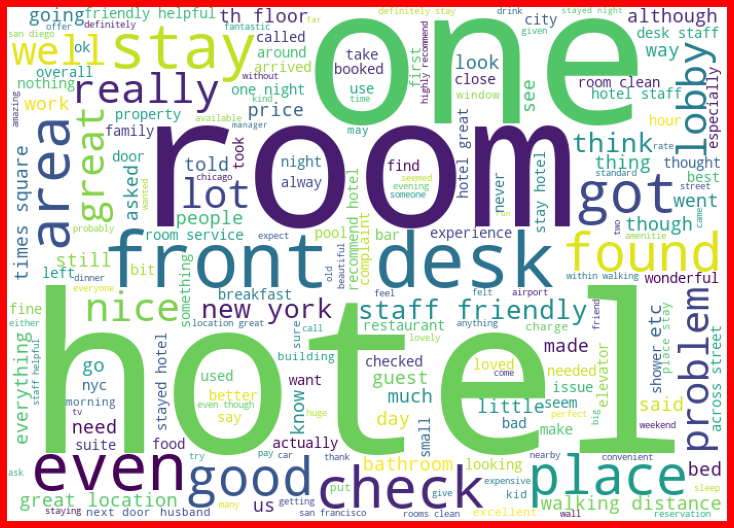

In [34]:
from wordcloud import WordCloud

#LETS HAVE A LOOK AT TESTING DATASET,HERE ALSO I CAN SEE ROOM FRONT DESK OCCUR MOST FREQUENTLY,
#WORDS SUCH AS GOOD,ROOM CLEAN,GREAT,FREINDLY ,HELPFUL ARE   ALSO PRESENT
reviews = hotel_test['review']

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
for index,text in enumerate(hotel_train['review'][35:40]):
  print('Review %d:\n'%(index+1),text)


In [35]:
hotel_test['clean_length'] = hotel_test.review.str.len()
hotel_test.head()

,review,length,clean_length
0,looking motel close proximity tv taping dr phi...,676,443
1,walking distance madison square garden penn su...,588,395
2,visited seattle business spent nights vintage ...,863,605
3,hotel location excellent rooms clean suite one...,778,448
4,hotel awesome love service anthony really grea...,255,180


# APPENDING THE TEST AND TRAIN DATA 

In [36]:
hotel_df=hotel_train.append(hotel_test)

In [37]:
hotel_df.head()

,review,label,length,clean_length,polarity
0,room kind clean strong smell dogs generally av...,1.0,248,134,0.366964
1,stayed crown plaza april april staff friendly ...,1.0,1077,637,0.086634
2,booked hotel hotwire lowest price could find g...,1.0,1327,768,0.142882
3,stayed husband sons way alaska cruise loved ho...,0.0,502,333,0.696000
4,girlfriends stayed celebrate th birthdays plan...,1.0,1613,941,0.128258


In [38]:
hotel_df.shape

(68336, 5)

In [39]:
hotel_df.head()

,review,label,length,clean_length,polarity
0,room kind clean strong smell dogs generally av...,1.0,248,134,0.366964
1,stayed crown plaza april april staff friendly ...,1.0,1077,637,0.086634
2,booked hotel hotwire lowest price could find g...,1.0,1327,768,0.142882
3,stayed husband sons way alaska cruise loved ho...,0.0,502,333,0.696000
4,girlfriends stayed celebrate th birthdays plan...,1.0,1613,941,0.128258


In [ ]:
#CLEANING THE WHOLE DATASET OF TRAIN AND TEST

In [40]:
hotel_df['review'] = hotel_df['review'].str.lower()

In [41]:
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','i','and','on'])
punct =string.punctuation


hotel_df['review'] = hotel_df['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [42]:
hotel_df['review'] = hotel_df['review'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
hotel_df['review'] = hotel_df['review'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
hotel_df['review'] = hotel_df['review'].str.replace(r'^\s+|\s+?$', '')
hotel_df['review'] = hotel_df['review'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
hotel_df['review'] = hotel_df['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))


# LET'S DO PREDICTION ON TRAINING DATASET 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

x = tf_vec.fit_transform(hotel_train['review'])


y = hotel_train['label']

In [44]:
x.shape

(38932, 46684)

In [45]:
y.shape

(38932,)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

naive.fit(x_train,y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8073564163156273


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88      6637
           1       0.96      0.41      0.58      3096

    accuracy                           0.81      9733
   macro avg       0.87      0.70      0.73      9733
weighted avg       0.84      0.81      0.78      9733



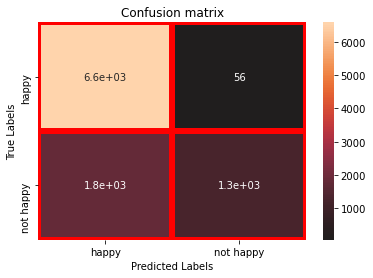

In [48]:
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','not happy'])
ax.yaxis.set_ticklabels(['happy','not happy'])
plt.show()       

In [49]:
conf_mat

array([[6581,   56],
       [1819, 1277]], dtype=int64)

# NOW LETS PREDICT ON THE WHOLE DATASET(FINAL MODEL COMPRISING OF TEST AND TRAIN)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

X_train= tf_vec.fit_transform(hotel_df['review'])[0:20000]
X_test=tf_vec.transform(hotel_df['review'])[:2000]
Y_train=hotel_df['label'].values[0:20000]
Y_test = hotel_df['label'][0:2000]


#I HAVE DIVIDED MY DATA BY 90 PERCENT FOR TRAINING AND 10 PERCENT FOR TESTING,I HAVE TAKEN 20,000 FOR X_TRAIN(REVIEW) 
#AND 20,000 FOR Y_TRAIN (LABEL) AND ALSO  TAKEN LAST 2000 ROWS FROM HOTEL_TRAIN(REVIEW) THAT HAS TESTING DATASET VALUES 
#AND SIMILARLY 2000 FOR TEST(LABEL) 
#40,000 SAMPLES OF TRAINING
#4,000 SAMPLES OF TESTING





In [51]:
X_train.shape

(20000, 60647)

In [52]:
X_test.shape

(2000, 60647)

In [53]:
Y_train.shape

(20000,)

In [54]:
Y_test.shape

(2000,)

In [ ]:
#NAIVE BAYES CLASSIFIER

In [55]:

naive.fit(X_train,Y_train)

y_pred= naive.predict(X_test)

print ('Final score = > ', accuracy_score(Y_test,y_pred))

Final score = >  0.763


In [56]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1341
         1.0       1.00      0.28      0.44       659

    accuracy                           0.76      2000
   macro avg       0.87      0.64      0.64      2000
weighted avg       0.82      0.76      0.71      2000



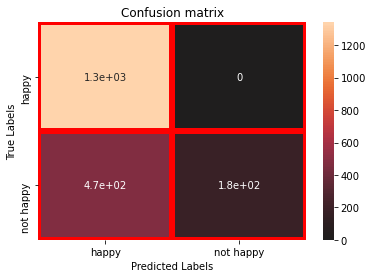

In [57]:
conf_mat = confusion_matrix(Y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','not happy'])
ax.yaxis.set_ticklabels(['happy','not happy'])
plt.show()

In [58]:
conf_mat

array([[1341,    0],
       [ 474,  185]], dtype=int64)

In [59]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [60]:
y_pred_prob=naive.predict_proba(X_test)[:,1]

In [61]:
y_pred_prob

array([0.27240635, 0.28465191, 0.21633897, ..., 0.00474332, 0.02684145,
       0.61565093])

In [62]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)

In [63]:
auc_score=roc_auc_score(Y_test,naive.predict(X_test))

In [64]:
auc_score

0.6403641881638846

In [ ]:
#LOGISTIC REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [68]:
pred=lg.predict(X_test)
print("accuracy_score:",accuracy_score(Y_test,pred))

accuracy_score: 0.922


In [69]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1341
         1.0       0.92      0.84      0.88       659

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



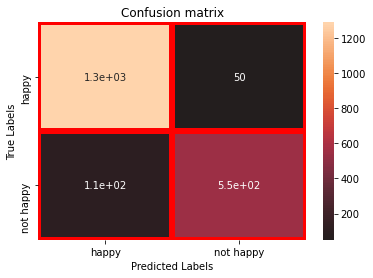

In [70]:
conf_mat = confusion_matrix(Y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','not happy'])
ax.yaxis.set_ticklabels(['happy','not happy'])
plt.show()

In [71]:
conf_mat

array([[1291,   50],
       [ 106,  553]], dtype=int64)

In [72]:
y_pred_prob=lg.predict_proba(X_test)[:,1]

In [73]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)

In [74]:
auc_score=roc_auc_score(Y_test,lg.predict(X_test))

In [75]:
auc_score

0.900932309931098

In [ ]:
#ACCURACY AND ROC SCORE INCREASED FROM 76 (NAIVE BAYES) TO 90 IN CASE OF (LOGISTIC REGRESSION)

In [ ]:
#DECISION TREE CLASSIFIER WE CAN SEE ACCURACY SCORE OF 1

In [76]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(X_train,Y_train)
preddct=dct.predict(X_test)
print(classification_report(Y_test,preddct))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1341
         1.0       1.00      1.00      1.00       659

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [77]:
conf_mat = confusion_matrix(Y_test,preddct)
conf_mat

array([[1341,    0],
       [   0,  659]], dtype=int64)

In [78]:
y_pred_prob=dct.predict_proba(X_test)[:,1]

In [79]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)

In [80]:
auc_score=roc_auc_score(Y_test,dct.predict(X_test))
auc_score

1.0

In [ ]:
#ALSO FOR RANDOM FOREST CLASSIFIER ACCURACY AND AUC SCORE OF 1

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_predict=rf.predict(X_test) 
print(classification_report(Y_test,rf_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1341
         1.0       1.00      1.00      1.00       659

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [82]:
y_pred_prob=rf.predict_proba(X_test)[:,1]

In [83]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_prob)

In [84]:
auc_score=roc_auc_score(Y_test,rf.predict(X_test))
auc_score

1.0

In [ ]:
#ADA BOOST CLASSIFIER

In [85]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=7)
ad.fit(X_train,Y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(Y_test,ad_pred))
print(confusion_matrix(Y_test,ad_pred))
print(classification_report(Y_test,ad_pred))

0.737
[[1305   36]
 [ 490  169]]
              precision    recall  f1-score   support

         0.0       0.73      0.97      0.83      1341
         1.0       0.82      0.26      0.39       659

    accuracy                           0.74      2000
   macro avg       0.78      0.61      0.61      2000
weighted avg       0.76      0.74      0.69      2000



In [ ]:
#SUPPORT VECTOR CLASSIFIER

In [86]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(X_train,Y_train)
svc.score(X_test,Y_test)

0.9835

In [ ]:
#KNEIGHBORS CLASSIFIER

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
print(classification_report(Y_test,predknn))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      1341
         1.0       0.90      0.57      0.70       659

    accuracy                           0.84      2000
   macro avg       0.86      0.77      0.79      2000
weighted avg       0.85      0.84      0.83      2000



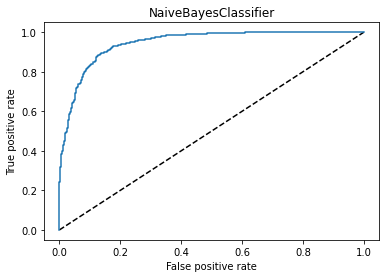

In [88]:
y_pred_prob=naive.predict_proba(X_test)[:,0]
tpr,fpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='NaiveBayesClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('NaiveBayesClassifier')
plt.show()

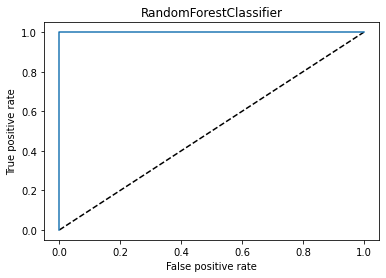

In [89]:
y_pred_prob=rf.predict_proba(X_test)[:,0]
tpr,fpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

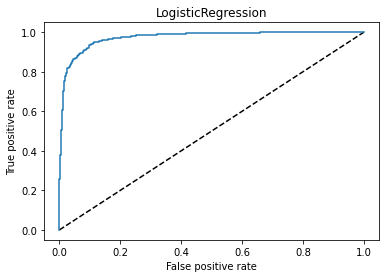

In [90]:
y_pred_prob=lg.predict_proba(X_test)[:,0]
tpr,fpr,thresholds=roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()

In [ ]:
# SO WE CAN CONLUDE RANDOM FOREST CLASSIFIER & DECISION TREE CLASSIFIER & LOGISTIC REGRESSION 
#WORKS BEST WITH ACCURACY OF( 1,1 AND 0.90) RESPECTIVELY 